# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("data","Mouse_metadata.csv")
study_results_path = os.path.join("data","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
len(data['Mouse ID'].unique())

249

In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_duplicate_mice_mask = data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
data_duplicate_mice = data[data_duplicate_mice_mask]

duplicate_mice_id = data_duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_mouse_id = 'g989'
drop_mouse_id_mask = data['Mouse ID'] == drop_mouse_id

data_less_duplicate_mouse_id = data[~drop_mouse_id_mask]
data_less_duplicate_mouse_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice in the clean DataFrame.
len(data_less_duplicate_mouse_id['Mouse ID'].unique())

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

data_clean = data_less_duplicate_mouse_id
data_clean_grouped = data_clean.groupby(['Drug Regimen'])
mean_tv = data_clean_grouped[['Tumor Volume (mm3)']].mean()
median_tv = data_clean_grouped[['Tumor Volume (mm3)']].median()
variance_tv = data_clean_grouped[['Tumor Volume (mm3)']].var()
stdev_tv = data_clean_grouped[['Tumor Volume (mm3)']].std()
sem_tv = data_clean_grouped[['Tumor Volume (mm3)']].sem()

df_sum_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tv['Tumor Volume (mm3)'],
    'Median Tumor Volume': median_tv['Tumor Volume (mm3)'],
    'Tumor Volume Variance': variance_tv['Tumor Volume (mm3)'],
    'Tumor Volume Std. Dev.': stdev_tv['Tumor Volume (mm3)'],
    'Tumor Volume Std. Err.': sem_tv['Tumor Volume (mm3)']
})

df_sum_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

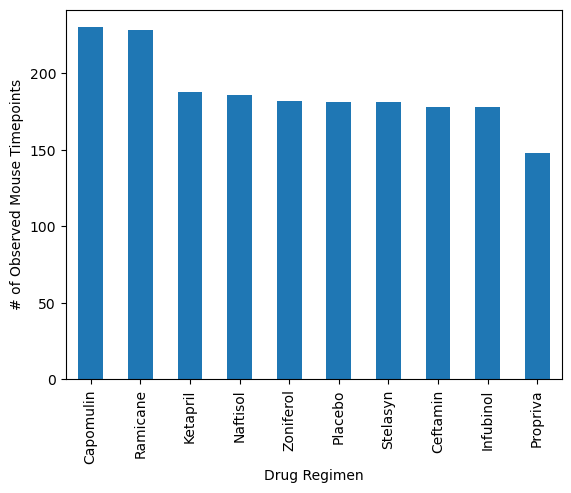

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
qty_timepoints = data_clean_grouped[['Timepoint']].count().sort_values(by='Timepoint', ascending=False)

qty_timepoints.plot(kind='bar',legend=False,ylabel='# of Observed Mouse Timepoints')

plt.show()

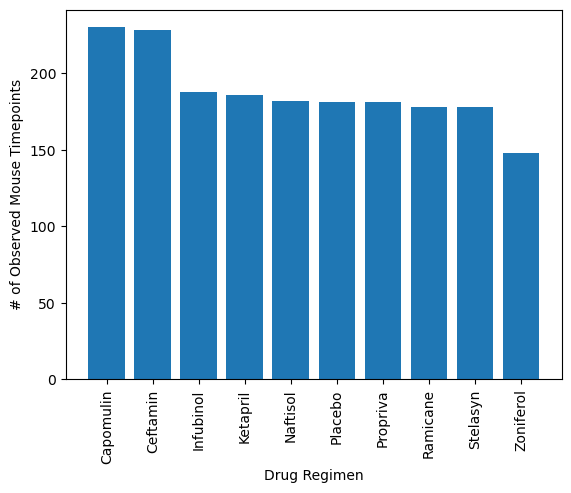

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
qty_timepoints = data_clean_grouped[['Timepoint']].count().sort_values(by='Timepoint', ascending=False)

qty_timepoints = qty_timepoints['Timepoint']
x_axis = np.arange(len(qty_timepoints))

plt.bar(x_axis, qty_timepoints, alpha=1, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_clean_grouped.indices,rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

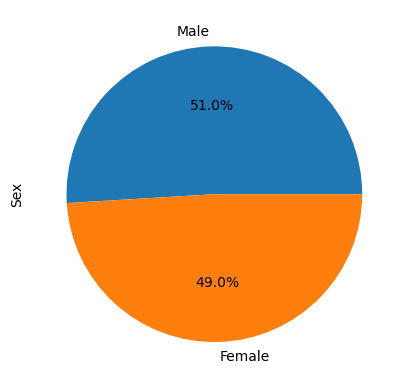

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = data_clean.groupby(['Sex']).count().sort_values(by='Mouse ID',ascending=False)
mice_sex = mice_sex['Mouse ID'].rename('Sex')
mice_sex

labels = mice_sex.index.unique()

mice_sex.plot(kind='pie',subplots=True,labels=labels, autopct="%1.1f%%")

plt.show()

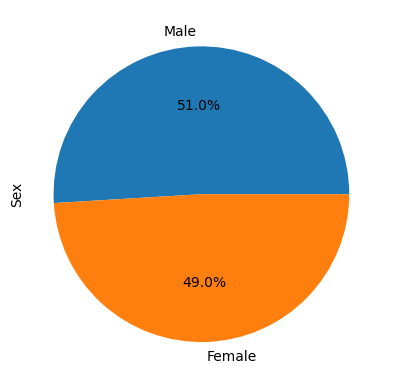

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = data_clean.groupby(['Sex']).count().sort_values(by='Mouse ID',ascending=False)
mice_sex = mice_sex['Mouse ID'].rename('Sex')

labels = mice_sex.index.unique()

plt.pie(mice_sex, labels=labels, autopct="%1.1f%%",)

plt.text(-1.2, 0, 'Sex', verticalalignment='center', horizontalalignment='right', rotation='vertical')

plt.show()

## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoints = data_clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_latest_timepoints = pd.merge(data_clean,latest_timepoints,on=['Mouse ID','Timepoint'])
data_latest_timepoints

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [210]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tv = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = data_latest_timepoints.loc[(data_latest_timepoints['Drug Regimen'] == treatment),'Tumor Volume (mm3)']
    # add subset 
    tv.append(subset)

    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lower_bound = quartiles[0.25]
    upper_bound = quartiles[0.75]
    iqr = upper_bound-lower_bound
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    if not outliers.empty:
        print(f"{treatment}'s potential outliers : {outliers}")


Capomulin's potential outliers : 46     46.539206
56     30.485985
126    41.483008
152    31.896238
176    40.658124
198    28.430964
201    28.484033
204    23.343598
209    40.728578
233    47.685963
243    41.581521
244    31.023923
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers : 21     43.166373
44     44.183451
79     43.419381
118    31.095335
131    45.220869
150    30.276232
154    30.638696
163    30.564625
169    22.050126
191    43.047543
222    40.667713
225    29.128472
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers : 20     36.321346
22     46.250112
23     47.010364
24     45.699331
45     51.542431
61     50.005138
116    67.289621
134    67.685569
136    72.226731
144    66.196912
149    66.083066
159    67.973419
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : 7      45.000000
8      45.000000
10     45.000000
11     45.000000
25     47.784682
33     46.784535
121    64.729837
122    68.594745

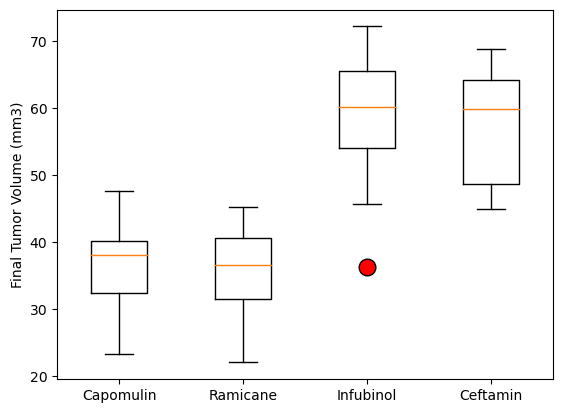

In [218]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tv,labels=treatments, flierprops={'marker':'o','markersize': 12,'markerfacecolor':'red'})
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

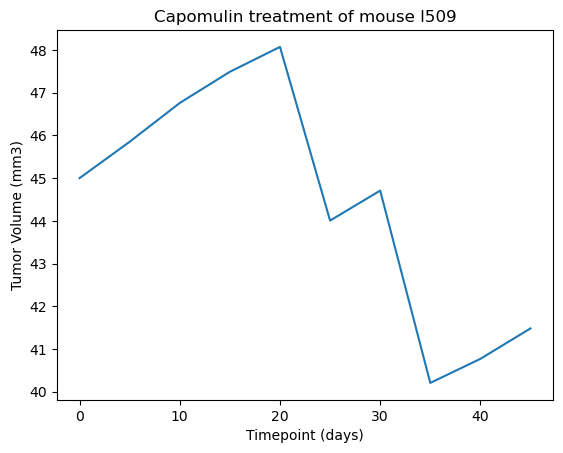

In [227]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse = 'l509'
treatment = 'Capomulin'

mask = data_clean['Mouse ID'] == mouse
data_clean_1mouse = data_clean[mask]

data_clean_1mouse.plot(x='Timepoint',y='Tumor Volume (mm3)',title=f'{treatment} treatment of mouse {mouse}',
                       xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)',legend=False)

plt.show()


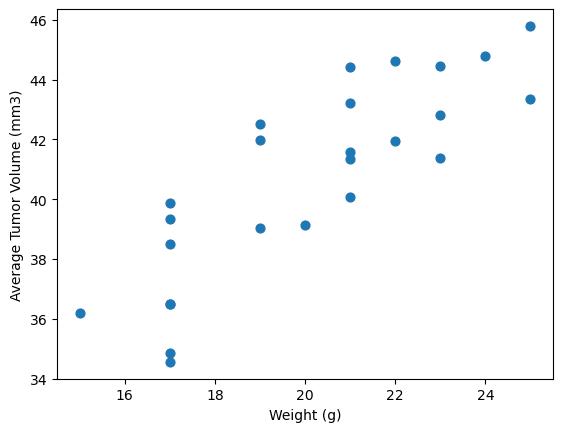

In [242]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

treatment = 'Capomulin'

mask = data_clean['Drug Regimen'] == treatment
data_clean_1treatment = data_clean[mask]

avg_tv = data_clean_1treatment.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()
avg_tv
avg_tv.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', s=40,ylabel='Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


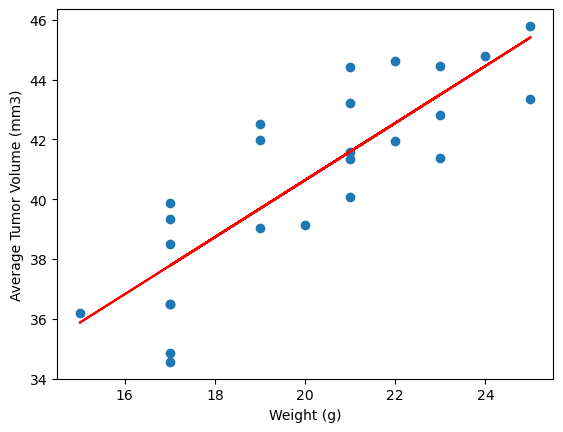

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
